# Downloading the Dataset

The data available on kaggle Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

In [1]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


Let's begin by downloading the data, and listing the files within the dataset.



A (free) account on Kaggle is needed in order to download this dataset. This way the latest data is acquired.



In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023'
od.download('https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023')

Skipping, found downloaded files in ".\data-science-salaries-2023" (use force=True to force download)


In [3]:
data_dir = './data-science-salaries-2023'

The folder containing all the files can be viewed as a list.



In [4]:
import os
os.listdir(data_dir)

['ds_salaries.csv']

The dataset has been downloaded and extracted.



In [5]:
data_dir

'./data-science-salaries-2023'

In [6]:
project_name = "Data Science Salaries 2023"

## Data Preparation and Cleaning
The data is already pretty clean.

In [7]:
import pandas as pd
import numpy as np

First we load all base csv files.



In [8]:
df = pd.read_csv(data_dir + './ds_salaries.csv') 

First we need to look at the work year data and the other data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Taking a sample:

In [10]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


#### Check for missing data

In [11]:
df.isna().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Some Statistics 

In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


check the columns names to work with it

In [13]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [15]:
df.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

In [16]:
df.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [17]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

### Arrange the data to be readable

In [18]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT': 'Full Time', 'CT': 'Contractual', 'FL':'Freelancer', 'PT': 'Part time'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Work from site', 50: 'Hyprid', 0:'Remotly'})
df['company_size'] = df['company_size'].replace({'L':'Large company', 'M': 'Medium company', 'S': 'Small company'})

#### Check for duplicates

In [19]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 11)

In [20]:
df.drop_duplicates(keep='last', inplace = True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,Work from site,ES,Large company
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,Work from site,US,Small company
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,Work from site,US,Small company
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,CA,Work from site,CA,Medium company
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,CA,Work from site,CA,Medium company
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full Time,Data Scientist,412000,USD,412000,US,Work from site,US,Large company
3751,2021,Mid-level,Full Time,Principal Data Scientist,151000,USD,151000,US,Work from site,US,Large company
3752,2020,Entry-level,Full Time,Data Scientist,105000,USD,105000,US,Work from site,US,Small company
3753,2020,Entry-level,Contractual,Business Data Analyst,100000,USD,100000,US,Work from site,US,Large company


In [21]:
df.shape

(2584, 11)

In [22]:
df.experience_level.unique()

array(['Senior', 'Mid-level', 'Entry-level', 'Executive-level'],
      dtype=object)

### Drop unnecessary columns

In [23]:
df.drop(['salary', 'salary_currency'],axis=1, inplace=True)

Exploratory Analysis and Visualization
Exploratory data analysis is a way to better understand data. The numerical data will be visualized in graphs.

Let's begin by importingmatplotlib.pyplot and seaborn. Some graph visualization options are set as well.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Let's find out the salary with the work year

Text(0.5, 1.0, 'Salaries by Work year\n')

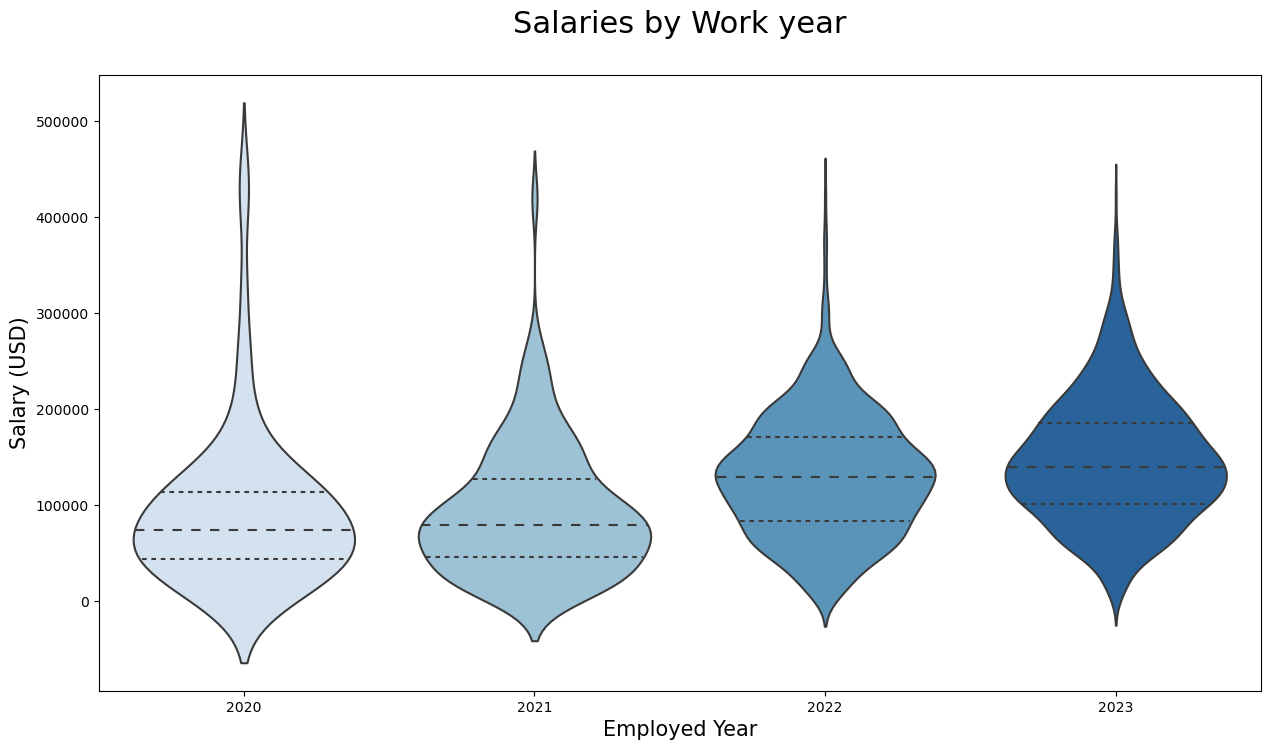

In [25]:
plt.figure(figsize=(15,8))
median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
sns.violinplot(x='work_year', y='salary_in_usd', data=df, palette='Blues', inner='quartile')
plt.xlabel('Employed Year', fontsize=15)
plt.ylabel('Salary (USD)', fontsize=15)
plt.title('Salaries by Work year\n', fontsize= 22, loc='center')

- It dosen't depend on work year because the latest employees where employed take the top salaries

### let's find out the type of Distribution

salary mean is :  133409.28018575851
salary mode is :  0    100000
Name: salary_in_usd, dtype: int64
salary median is :  130000.0


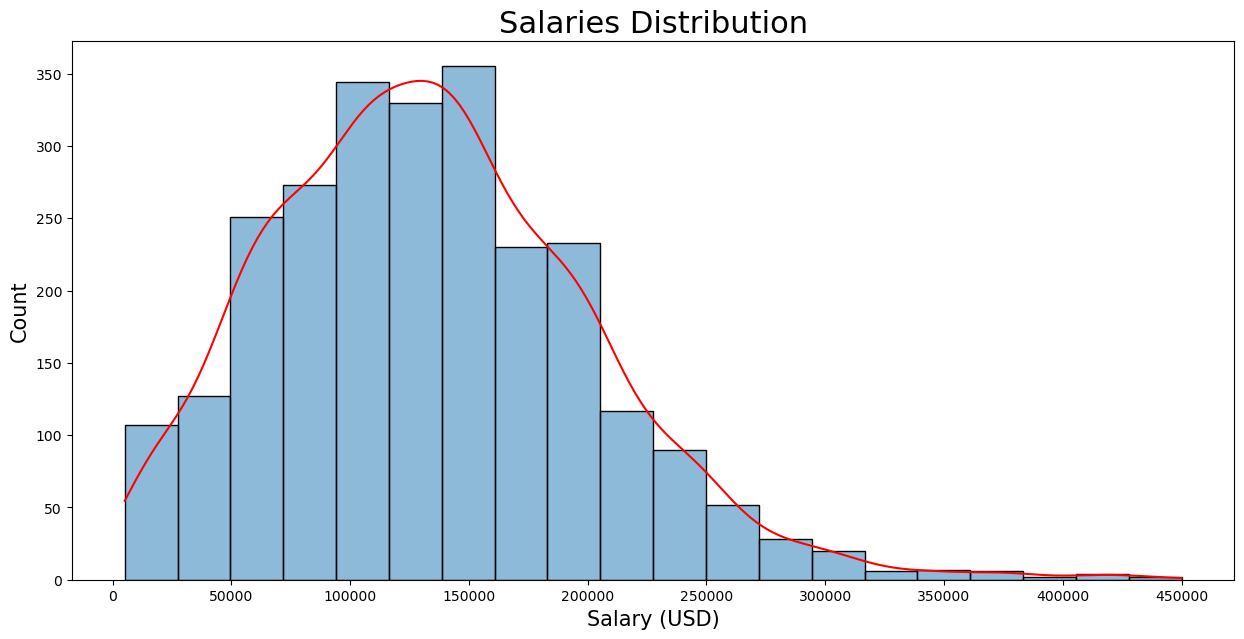

In [26]:
plt.figure(figsize=(15,7))
ax = sns.histplot(x='salary_in_usd', data=df, kde=True, bins=20)
plt.xticks(np.arange(0,500000,50000))
ax.lines[0].set_color('red') #change color of kde line
plt.title('Salaries Distribution', fontsize=22, loc='center')
plt.xlabel('Salary (USD)', size=15)
plt.ylabel('Count', size=15)
means=df['salary_in_usd'].mean()
print('salary mean is : ',means)
mood=df['salary_in_usd'].mode()
print('salary mode is : ',mood)
med=df['salary_in_usd'].median()
print('salary median is : ',med)

- Right Skewed Distribution

### The Top 3 Jobs in the last 4 years with the experience level

In [27]:
df2 = df.groupby(['experience_level'])['job_title'].value_counts().groupby(level=0, group_keys=False).head(3)

Text(0, 0.5, 'Count')

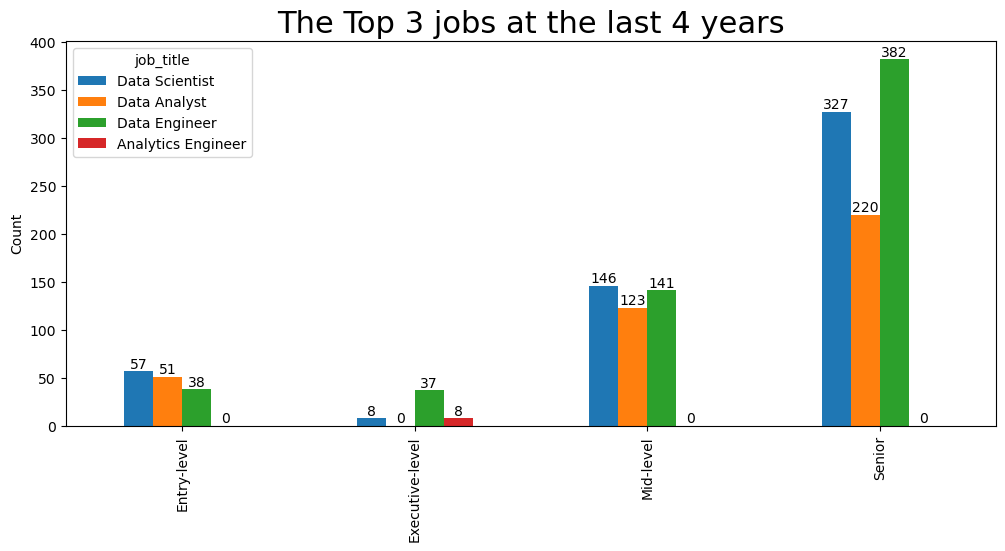

In [28]:
ax = df2.unstack(level=1).plot(kind= 'bar', figsize = (12, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.title('The Top 3 jobs at the last 4 years', size=22, loc='center')
plt.xlabel('')
plt.ylabel('Count')

### Companies and the number of employees

In [29]:
df3 = df.groupby(['company_size'])['experience_level'].value_counts()

Text(0, 0.5, 'Count')

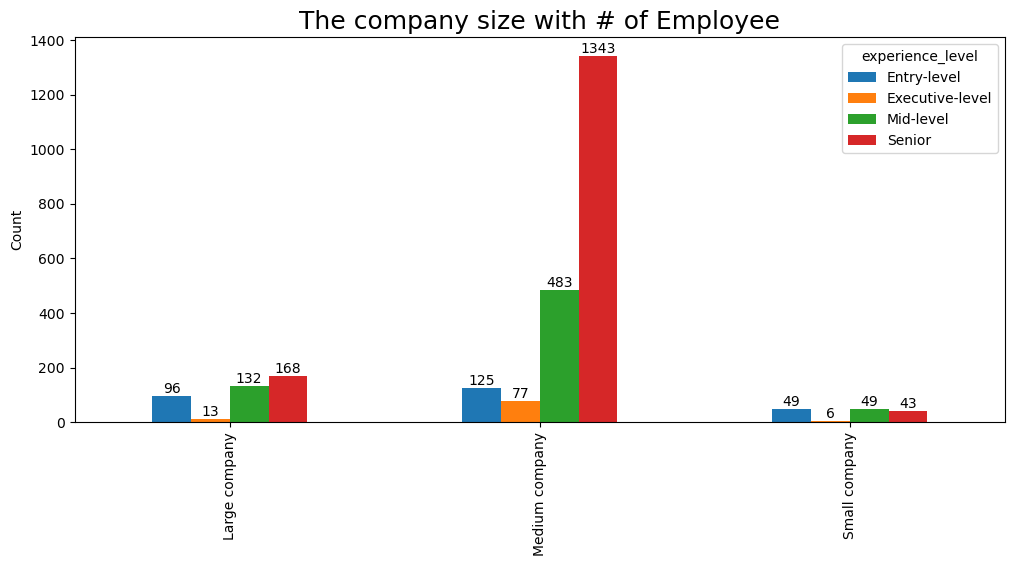

In [30]:
ax = df3.unstack(level=1).plot(kind= 'bar', figsize = (12, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.title('The company size with # of Employee', size=18, loc='center')
plt.xlabel('')
plt.ylabel('Count')

### The Top 5 Countries with the number of company 

Text(0.5, 1.0, 'Top 5 Countries with The Most Companies')

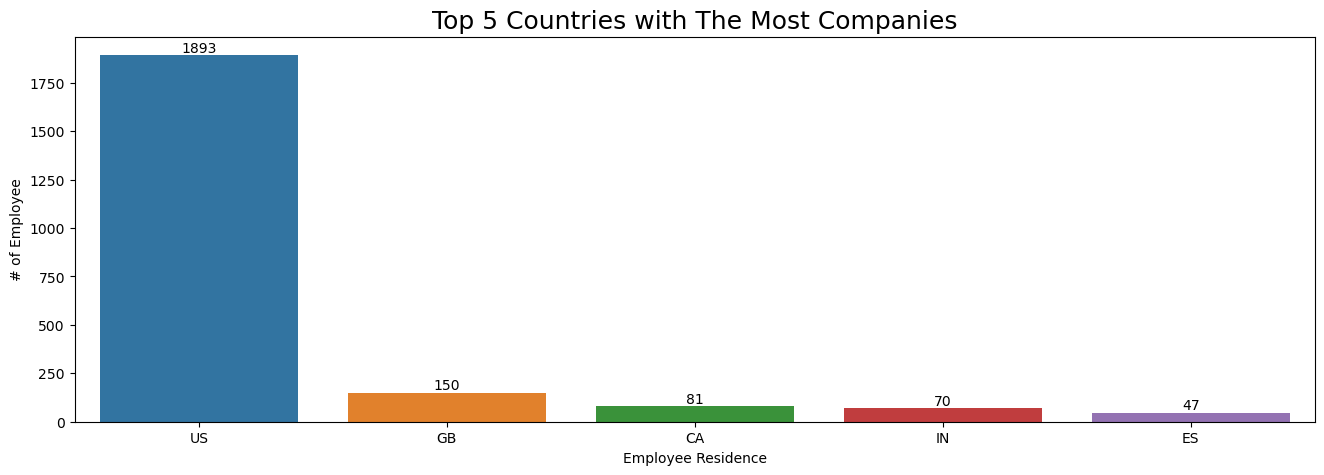

In [31]:
fig = plt.figure(figsize = (16, 5))

order = df.employee_residence.value_counts().iloc[:5].index
ax = sns.countplot(data=df, x='employee_residence',order=order)
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Employee Residence")
plt.ylabel("# of Employee")
plt.title('Top 5 Countries with The Most Companies', fontsize = 18)

### Salary according to experience level  

In [57]:
job_expe = df.groupby('experience_level').agg({'salary_in_usd':'median'}).sort_values('salary_in_usd', ascending=False)
job_expe

,salary_in_usd
experience_level,
Executive-level,189618.5
Senior,148800.0
Mid-level,95000.0
Entry-level,61900.0


###  does the Salary depend on employment type?

In [58]:
job_type = df.groupby('employment_type').agg({'salary_in_usd':'median'}).sort_values('salary_in_usd', ascending=False)
job_type

,salary_in_usd
employment_type,
Full Time,130000.0
Contractual,75000.0
Freelancer,50000.0
Part time,21669.0


### does the Salary depend on company size?

In [59]:
comp_size = df.groupby('company_size').agg({'salary_in_usd':'median'}).sort_values('salary_in_usd', ascending=False)
comp_size

,salary_in_usd
company_size,
Medium company,137067.5
Large company,100000.0
Small company,62726.0


In [60]:
print('the minimum salary is: ', df.salary_in_usd.min(),'\nthe average salary is: ', round(df.salary_in_usd.mean()),'\nthe max salary is: ', df.salary_in_usd.max())

the minimum salary is:  5132 
the average salary is:  133409 
the max salary is:  450000


In [61]:
df.company_location.value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    print(f'{i} : {len(df[i].unique())}')
    print()
    print(df[i].value_counts()[:10])
    print('\n')

work_year : 4

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64


experience_level : 4

Senior             1554
Mid-level           664
Entry-level         270
Executive-level      96
Name: experience_level, dtype: int64


employment_type : 4

Full Time      2547
Part time        17
Contractual      10
Freelancer       10
Name: employment_type, dtype: int64


job_title : 93

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64


salary_in_usd : 1035

100000    58
150000    56
120000    51
200000    47
130000    39
135000    36
160000    34
110000    33
140000    29
180000    28
Name: salary_in_usd, dtype: int64


employee_residence : 78

US    1893
GB 

# Asking and Answering Questions
#### Lets find out some more about Data Science salary will be answerred.

## Q1. What are the top 10 Job titles with the biggest income?

#### Top 10 : Job titles and associated average salary

In [38]:
Top10 = df.groupby('job_title').agg({'salary_in_usd':'median'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
Top10

,salary_in_usd
job_title,
Data Science Tech Lead,375000.0
Cloud Data Architect,250000.0
Data Lead,212500.0
Data Analytics Lead,211254.5
Head of Data,202500.0
Principal Data Engineer,192500.0
Applied Scientist,192000.0
Principal Machine Learning Engineer,190000.0
Data Infrastructure Engineer,183655.0


Text(0.5, 0.98, '\n\n\nCalculated by the median')

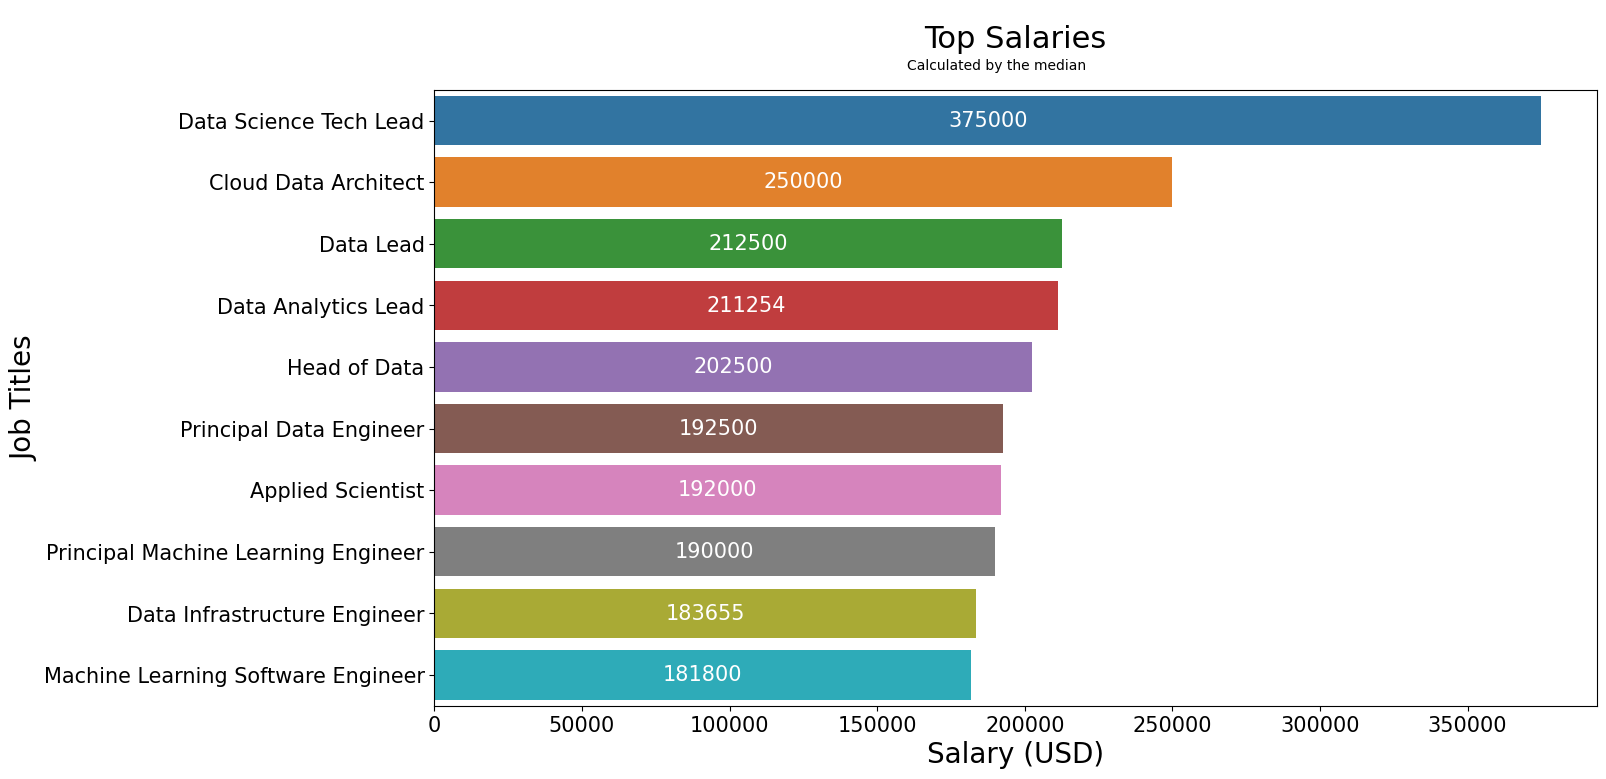

In [39]:
plt.figure(figsize=(15,8))
ax= sns.barplot(x='salary_in_usd', y= Top10.index,data = Top10)
for container in ax.containers:
    ax.bar_label(container, size = 15, label_type='center', color='white')
plt.xlabel('Salary (USD)', fontsize=20)
plt.ylabel('Job Titles', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Top Salaries\n', fontsize= 22, loc='center')
plt.suptitle('\n\n\nCalculated by the median', size=10)

- The top job title with salary is the Data Science Tech Lead with 375000 average salary per year

## Q2. Does the Salaries depend on Experience?

Text(0.5, 1.0, 'Salaries by the Experience level\n')

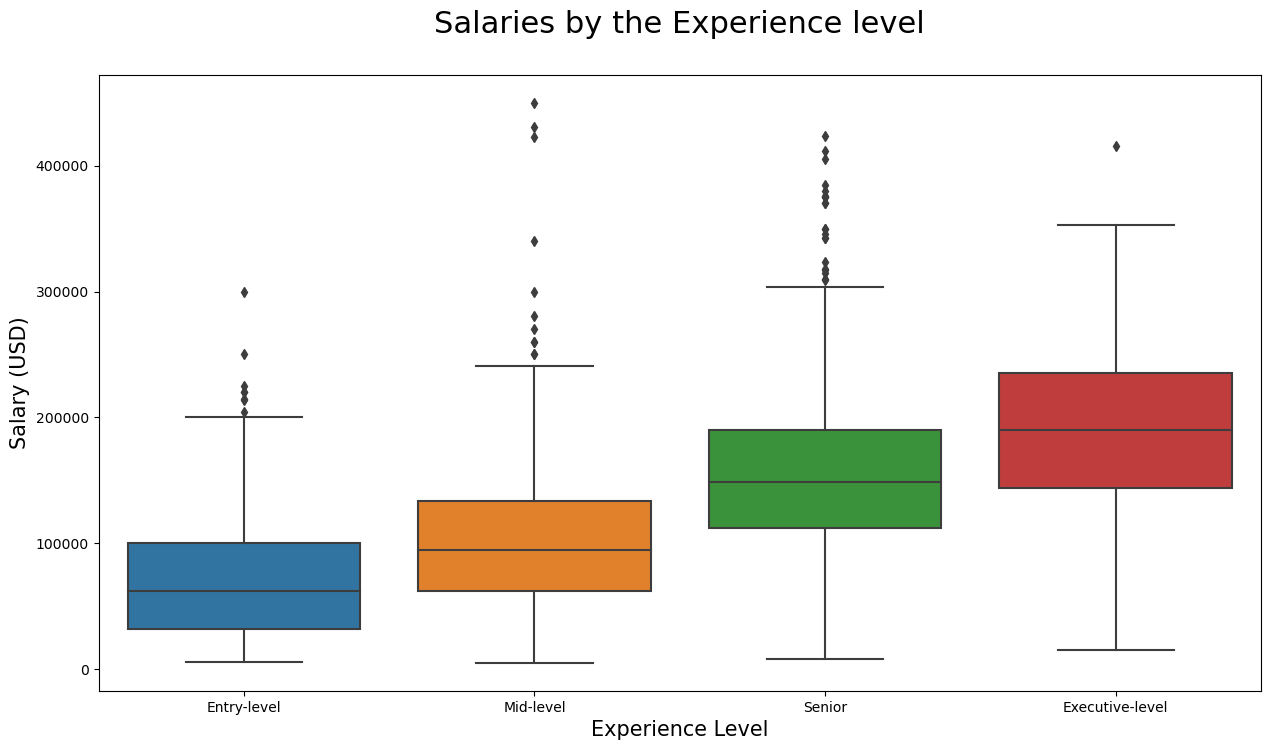

In [64]:
plt.figure(figsize=(15,8))
median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,  order= median_salary['experience_level'])
plt.xlabel('Experience Level', fontsize=15)
plt.ylabel('Salary (USD)', fontsize=15)
plt.title('Salaries by the Experience level\n', fontsize= 22, loc='center')

In [41]:
SE = df[df['experience_level']== 'Senior']
ML = df[df['experience_level']== 'Mid-level']
EN = df[df['experience_level']== 'Entry-level']
EX = df[df['experience_level']== 'Executive-level']

In [42]:
EX.groupby('experience_level')['salary_in_usd'].median()

experience_level
Executive-level    189618.5
Name: salary_in_usd, dtype: float64

In [43]:
SE.groupby('experience_level')['salary_in_usd'].median()

experience_level
Senior    148800.0
Name: salary_in_usd, dtype: float64

In [44]:
ML.groupby('experience_level')['salary_in_usd'].median()

experience_level
Mid-level    95000.0
Name: salary_in_usd, dtype: float64

In [45]:
EN.groupby('experience_level')['salary_in_usd'].median()

experience_level
Entry-level    61900.0
Name: salary_in_usd, dtype: float64

- The salaries depend on experience that the top level with salary is the Excutive-level and the lowest is the Entry-level

### Q3. Does Company size influence salary?

Text(0, 0.5, 'Salary')

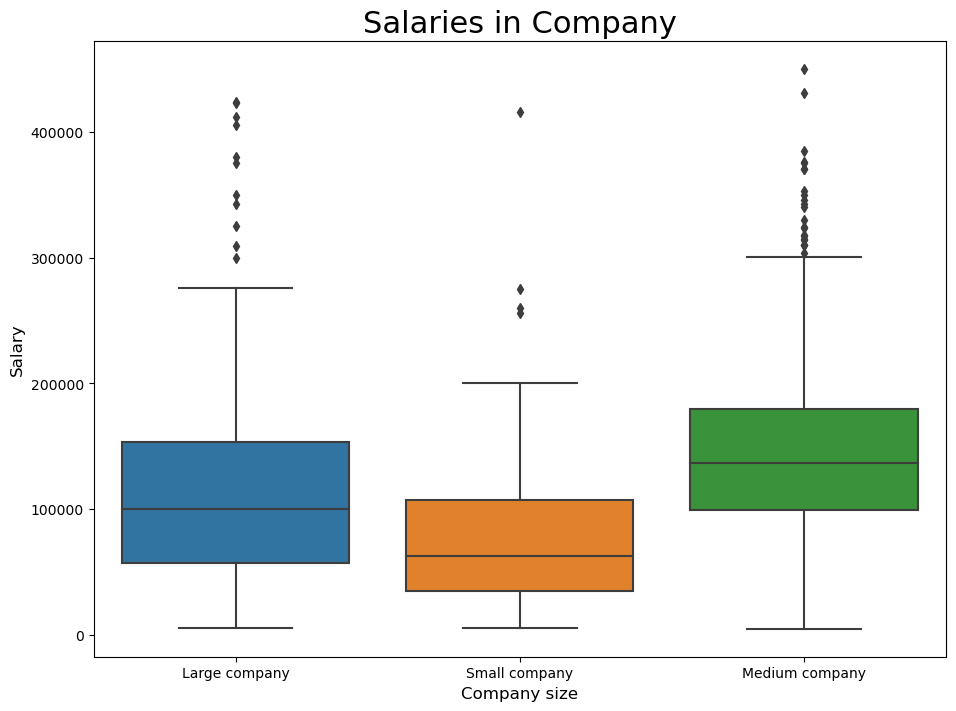

In [46]:
plt.figure(figsize=(11,8))
ax= sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salaries in Company', size=22, loc='center')
plt.xlabel('Company size', size=12)
plt.ylabel('Salary', size=12)

Text(-21.680555555555557, 0.5, 'Salary')

<Figure size 1100x800 with 0 Axes>

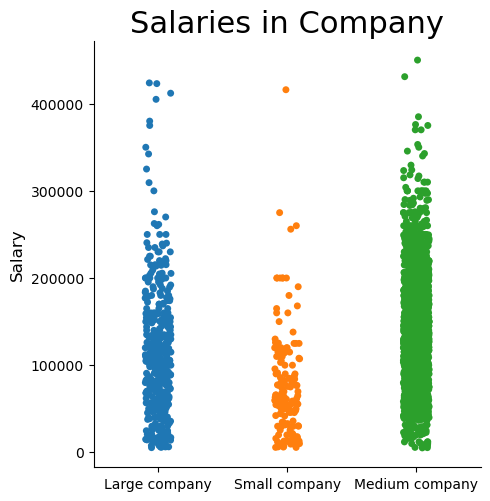

In [47]:
plt.figure(figsize=(11,8))
ax= sns.catplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salaries in Company', size=22, loc='center')
plt.xlabel('')
plt.ylabel('Salary', size=12)

In [48]:
M = df[df['company_size']=='Medium company']
L = df[df['company_size']=='Large company']
S = df[df['company_size']=='Small company']

In [49]:
L.groupby('company_size')['salary_in_usd'].median()

company_size
Large company    100000.0
Name: salary_in_usd, dtype: float64

In [50]:
M.groupby('company_size')['salary_in_usd'].median()

company_size
Medium company    137067.5
Name: salary_in_usd, dtype: float64

In [51]:
S.groupby('company_size')['salary_in_usd'].median()

company_size
Small company    62726.0
Name: salary_in_usd, dtype: float64

- The salary doesn't depend on the company size as the top salary are the medium salaries followed by the large company and the final is the small company

# Q4. what are the number of employees in remote ratio?

In [52]:
df.remote_ratio.value_counts()

Work from site    1211
Remotly           1186
Hyprid             187
Name: remote_ratio, dtype: int64

Text(0.5, 1.0, 'Remotly Ratio')

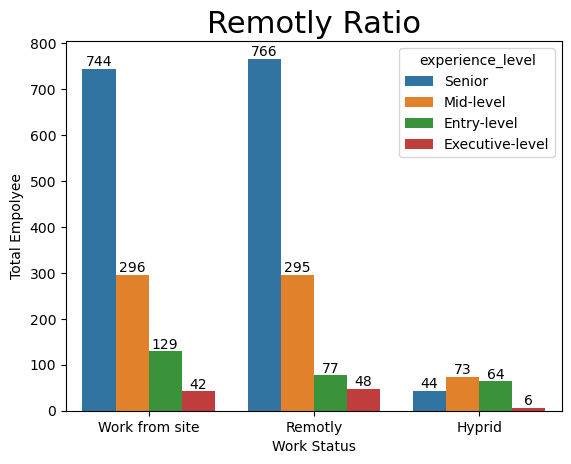

In [53]:
ax = sns.countplot(x='remote_ratio',hue='experience_level', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Work Status')
plt.ylabel('Total Empolyee')
plt.title("Remotly Ratio", fontsize=22)

Text(0.5, 1.0, 'Work Mode\n')

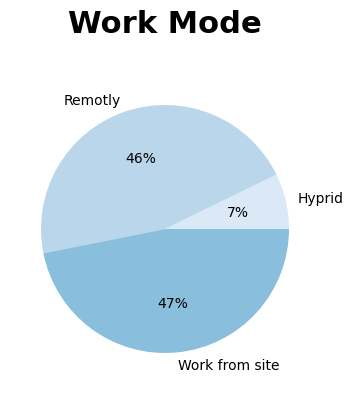

In [54]:

plt.figure(figsize=(4,6))
colors = sns.color_palette('Blues')
values = df.groupby('remote_ratio').size()
labels = values.index
#round(values/values.sum()*100, 2)

plt.pie(values, labels=labels, autopct='%1.0f%%',colors = colors)
plt.title("Work Mode\n", fontsize=22, fontweight="bold")

- work from site : (Senior : 744, Mid-level: 296, Entry-level: 129, Executive-level: 42)
- work from home : (Senior : 766, Mid-level: 295, Entry-level: 77, Executive-level: 48)
- Hyprid : (Senior : 44, Mid-level: 73, Entry-level: 64, Executive-level: 6)

### Q5. What are the most job titles in the last 4 years?

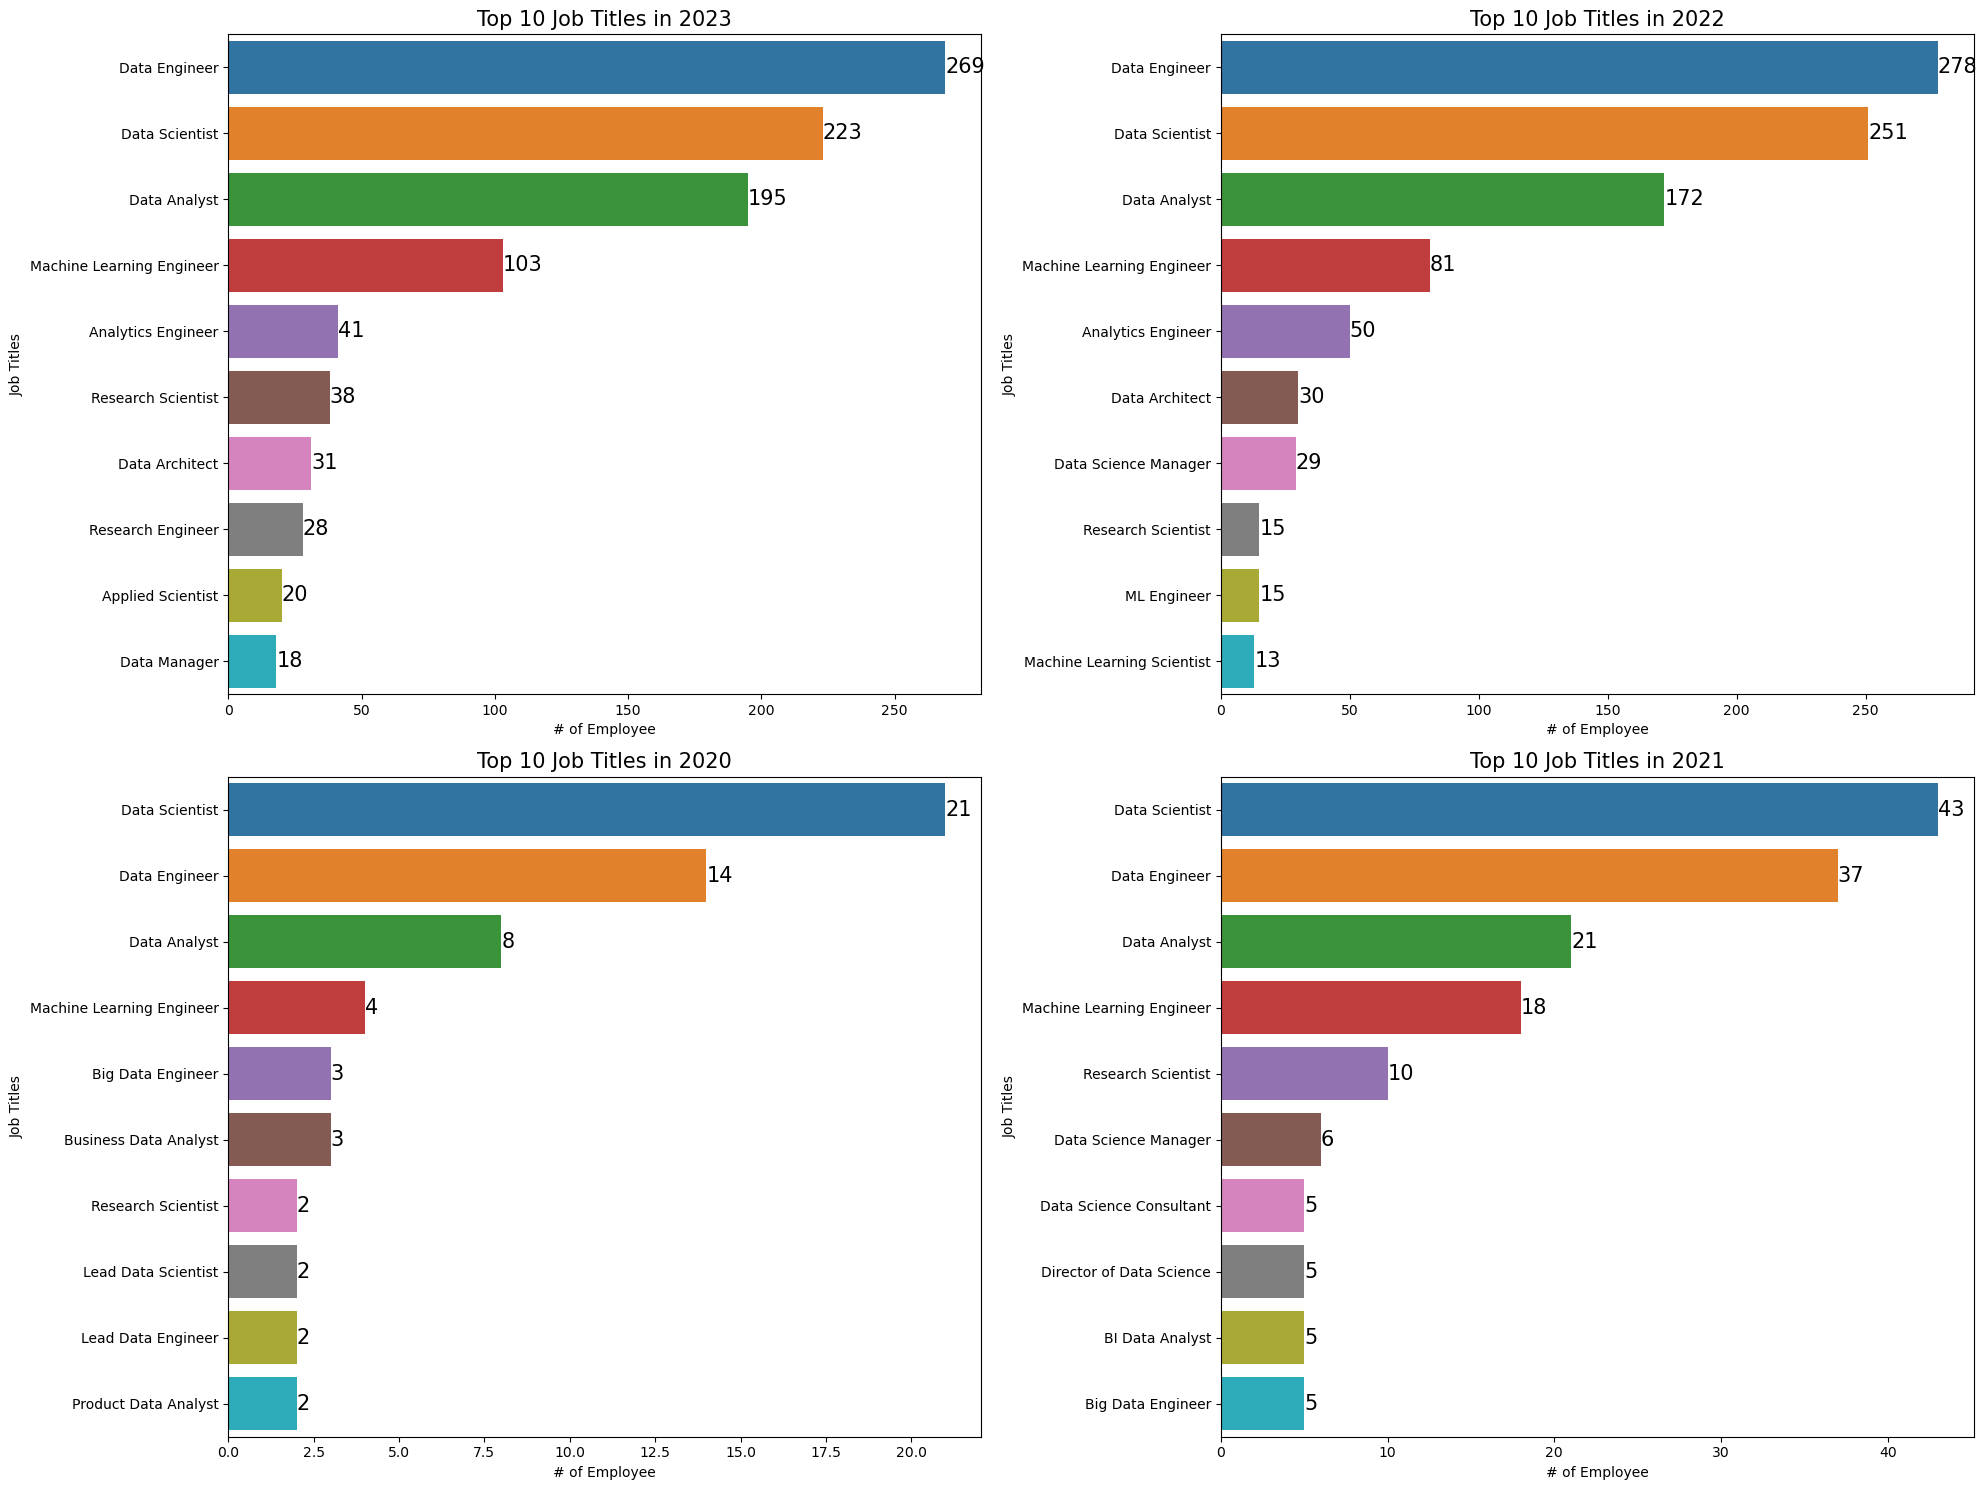

In [65]:
a = 2  
b = 2  
c = 1 
fig = plt.figure(figsize = (20, 15))

for year in df.work_year.unique():
    dft = df[df['work_year']==year]['job_title'].value_counts().nlargest(10).reset_index()
    
    plt.subplot(a, b, c)
    ax = sns.barplot(data = dft , y = dft['index'], x = dft.job_title)
    plt.ylabel('Job Titles')
    plt.xlabel('# of Employee')
    plt.title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)
    c = c + 1 # the year starts from 2019 and when we add 1 it would be 2020 and the full analysis below

plt.tight_layout()
plt.show()

In [66]:
df.job_title.value_counts().head(10)

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64

- at 2020 and 2021 the most job title was the Data Scientist after this the Data Engineer takes over the job title at 2022 and 2023
- over all the Data Engineer are the most job title